4. 커널 서포트 벡터 머신 ( SVM )

- 서포트 벡터 머신을 입력 데이터에서 단순한 초평면으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것.
- 분류와 회귀에 모두 사용가능  ( SVC, SVR)
- 수학적정의 -> 해이슽, 팁시라니, 프리드먼의 ' The Elements of Statistical Learnning' - https://statweb.stanford.edu/~itbs/ElemStatLearn/ 12장에서 자세히 확인가능 
- 직선과 초평면은 유연하지 못하여 저차원 데이터셋에서는 선형 모델이 매우 제한적.
  ( 특성끼리 곱하거나, 특성을 거듭제곱하는 식으로 특성을 추가함으로써 유연하게 만들 수 있다.)

예제 데이터셋을 확인

In [8]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
import mglearn
import numpy as np
import matplotlib.pyplot as plt

c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


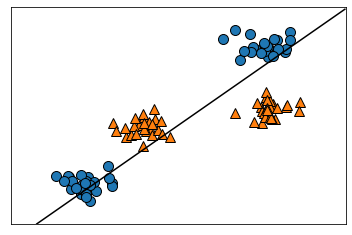

In [9]:
X,y = make_blobs (centers = 4, random_state = 8)
y = y%2

linear_svm=LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

- 분류를 위한 선형 모델은 직선으로만 데이터 포인트를 나눌 수 있어 예제와 같은 데이터셋에는 들어맞지 않는다.
- 두 번째 특성을 제곱한 특성 1 ** 2를 새로운 특성으로 추가하여 입력 특성 확장
  ( 특성0, 특성1, 특성 1 ** 2 ) 의 3차원 데이터 

Text(0.5, 0, 'F 1**2')

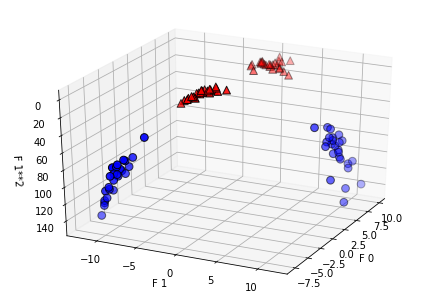

In [10]:
# 두번재 특성 제곱 추가
X_new = np.hstack ([X,X[:,1:]**2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

#그래프 
ax = Axes3D(figure, elev = -152, azim = -26)

mask = y==0
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b',
           cmap = mglearn.cm2, s=60, edgecolor = 'k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r', marker='^',
           cmap = mglearn.cm2, s=60, edgecolor = 'k')
ax.set_xlabel('F 0')
ax.set_ylabel('F 1')
ax.set_zlabel('F 1**2')

- 이렇게 표현된 새로운 데이터셋에서는 선형 모델과 3차원 공간의 평면을 사용해 두 클래스를 구분 가능하다.

In [11]:
linear_svm_3d=LinearSVC().fit(X_new,y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'F 1**2')

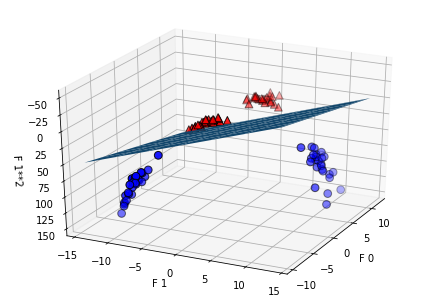

In [12]:
figure = plt.figure()

ax = Axes3D(figure, elev = -152, azim = -26)

xx=np.linspace(X_new[:,0].min() - 2, X_new[:,0].max() + 2, 50)
yy=np.linspace(X_new[:,1].min() - 2, X_new[:,1].max() + 2, 50)

XX,YY = np.meshgrid(xx, yy)
ZZ = ( coef[0]* XX +coef[1] *YY +intercept)/-coef[2]

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8)

ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b',
           cmap = mglearn.cm2, s=60, edgecolor = 'k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r', marker='^',
           cmap = mglearn.cm2, s=60, edgecolor = 'k')
ax.set_xlabel('F 0')
ax.set_ylabel('F 1')
ax.set_zlabel('F 1**2')

- 위와 같은 데이터셋에 비선형 특성을 추가하여 선형 모델을 강력하게 만들었지만
  특성이 많은 경우 어떤 특성을 추가해야하는지, 많은 추가로 인한 연산비용이 커지는 단점이 있다. 
- 이를 극복하기 위해 새로운 특성을 많이 만들지 않고 고차원에서 분류기를 학습 하게 하는 커널 기법이 있다.
- 커널 기법이란 실제로 데이터를 확장하지 않고 확장된 특성에 대한 데이터 포인트들의 거리(스칼라 곱)를 계산한다.

- SVM에서는 데이터를 고차원 공간에 매핑하는데 두가지 방법을 이용한다

    1) 원래 특성의 가능한 조합을 지정된 차수까지 모두 계산 ( ex) 특성 1 ** 2 X 특성 2 ** 5) 하는 다항식 커널
    
    2) 가우시안 커널로도 불리는 RBF(Radial Basis Function) 커널이 있다.
       ( 차원이 무한한 특성 공간에 매핑, 모든 차수의 모든 다항식을 고려하지만 특성의 중요도는 고차항이 될 수록 줄어든다. )

- 서포트 벡터란 두 클래스 사이의 경계에 위치한 데이터 포인드 들이다. ( 이름의 유래 )
- 새로운 데이터 포인트에 대해 예측하려면 각 서포트 벡터와의 거리를 측정 해야 한다. 
- 분류 결정은 서포트 벡터까지의 거리에 기반, 서포트 벡터의 중요도는 훈련과정에서 학습
- 데이터 포인트 사이의 거리는 가우시안 커널에 의해 계산된다

 𝑘_𝑟𝑏𝑓 (𝑥_1,𝑥_2 )=exp⁡(−𝑟‖𝑥_1−𝑥_2 ‖^2)

1)x1과 x2는 데이터 포인트이며 ‖𝑥_1−𝑥_2 ‖는 유클리디안 거리, r(감마)는 가우시안 커널의 폭을 제어하는 매개변수이다. 

Text(0, 0.5, 'F 1')

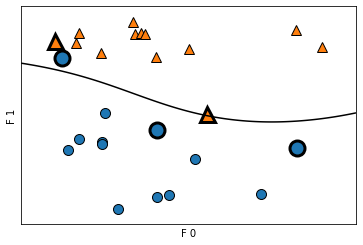

In [13]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel = 'rbf', C=10, gamma = 0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# 데이터 포인트
mglearn.discrete_scatter(X[:,0],X[:,1],y)
#서포트 벡터
sv = svm.support_vectors_
#dual_coef 부호에 의해 서포트 벡터의 클래스 레이블 결정
sv_labels = svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels, s = 15, markeredgewidth=3)
plt.xlabel('F 0')
plt.ylabel('F 1')

- 이 그림에서 경계는 비선형 경계를 만들었다.
- gamma 매개변수는 위의 공식에 나온 r로 가우시안 커널 폭의 역수에 해당한다.
  (훈련 샘플이 미치는 영향의 범위를 결정한다. 작으면 넓은 영역, 크면 영역을 제한 -> 즉 반경의 클 수록 훈련 샘플의 영향 범위도 커진다. )
- C 매개변수는 선형 모델에서 이용한 규제 매개변수와 비슷하다. 각 포인트의 중요도를 제한한다 ( dual_coef_ 값)

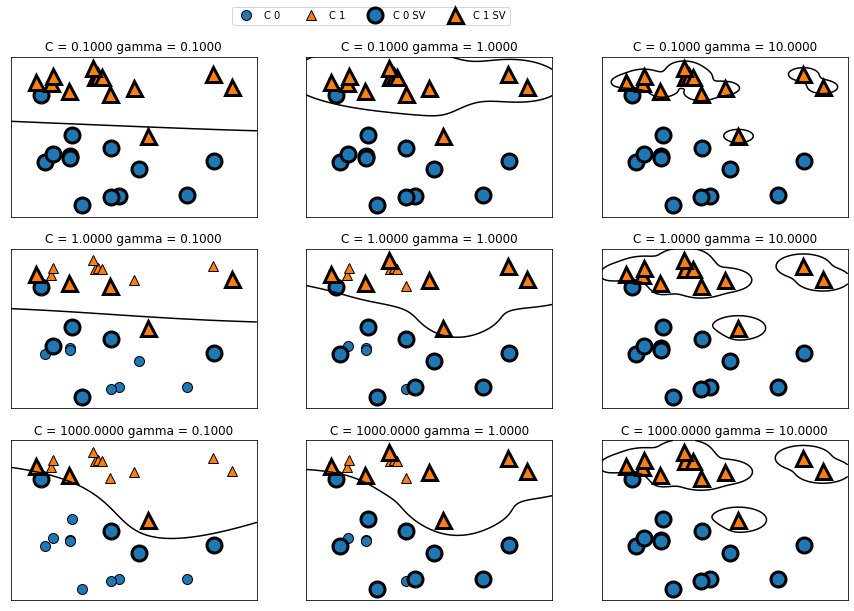

In [17]:
fig, axes = plt.subplots(3,3,figsize=(15,10))

for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax = a)

axes[0,0].legend(['C 0','C 1','C 0 SV','C 1 SV'],ncol=4, loc=(.9,1.2))

- 왼쪽에서 오른쪽으로 가며 gamma 값이 커지고 C값은 위에서 아래로 갈 수록 커진다.
- SVM은 매개변수 설정과 데이터 스케일에 매우 민감한 편이다. ( 입력 특성의 범위가 비슷해야 한다. )
- 따라서 데이터 전처리 시에 0과 1사이로 맞추는 방법인 StandardScaler와 MinMaxScarler 전처리 메서드를 주로 이용한다.


- 커널 서포트 벡터 머신은 강력하고 다양한 데이터 셋에 잘 작동되고 특성이 적어도 복잡한 결정 경계를 만들 수 있다. 
  다만 샘플이 많을 때는 속도와 메모리 관점에서는 시간적인 비용이 많이 소모된다. 
- 또한 데이터 전처리와 매개변수 설정에 신경을 많이 써야해서 대부분 랜덤 포레스트, 그레디언트 부스팅 모델을 많이 이용한다.
  ( 예측 결정 이해 어렵고, 비전문가에게 모델 설명하기도 난해하다.)
- 위에서는 RBF커널만 학습하였지만 사이킷런에는 매개변수 옵션이 linear ,poly, sigmoid, precomputed 가 있다.
   ( 이 부분은 추후에 학습할 예정 )